In [423]:
import matplotlib.pyplot as plt

import skimage.io as io
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.filters import threshold_mean, sobel
from skimage.color import rgb2gray
import numpy as np
import pandas as pd
import math
from typing import *

def print_img(title, image):
    plt.title(title)
    if len(image.shape) >= 3 and min(image.shape) > 1:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap=plt.cm.gray)
    plt.show()

def calc_euclidean(image1, image2):
    max_row_img2 = image2.shape[0] 
    max_col_img2 = image2.shape[1]

    euclid = 0.0

    for row in range(0, image1.shape[0]):
        for col in range(0, image1.shape[1]):
            if (row < max_row_img2 and col < max_col_img2):
                p = (image1[row][col] - image2[row][col]) ** 2
                euclid = euclid + p/100
    
    return 10 * math.sqrt(euclid)


base_dir = "../../data"

image_db = pd.read_csv(f'{base_dir}/ODIR-5K/data.csv')


#cataract = io.imread(f'{base_dir}/preprocessed_images/0_left.jpg')
#normal = io.imread(f'{base_dir}/preprocessed_images/0_right.jpg')


#print(cataract.shape)

#print_img('cataract', cataract)
#print_img('normal', normal)


#def histogram_propeties (image) -> List[float]:


# Algoritmo para detectar catarata:
# 1. Rodar um sobels
# se aparecerem veias, descartar
# se não aparecerem:
# testar Specularity = refractive media opacity
# https://github.com/muratkrty/specularity-removal
# http://alexandremorgand.fr/Morgand_Tamaazousti_VISAPP14.pdf
# se detectar acima de um minimo = opacity, caso contrário, 
# cataract




In [424]:
def show_histogram(image):
    fig, ax = plt.subplots(2,3)
    bins=256
    for ci, c in enumerate('rgb'):
        ax[0,ci].imshow(image[:,:,ci], cmap='gray')
        ax[1,ci].hist(image[:,:,ci].flatten(), bins = bins, density=True)


def calc_statistics_histogram(image):
    bins=256
    resp=[]
    for ci, c in enumerate('rgb'):
        p = np.histogram(image[:,:,ci].flatten(), bins = bins)[0]
        p[0] = 0
        resp.append(p)
    return resp
    


In [425]:
normal = io.imread(f'{base_dir}/preprocessed_images/0_right.jpg')
cataract = io.imread(f'{base_dir}/preprocessed_images/0_left.jpg')
opacity = io.imread(f'{base_dir}/preprocessed_images/156_left.jpg')

normal_2 = io.imread(f'{base_dir}/ODIR-5K/training/173_left.jpg')
cataract_2 = io.imread(f'{base_dir}/ODIR-5K/training/188_right.jpg')
opacity_2 = io.imread(f'{base_dir}/ODIR-5K/training/218_left.jpg')


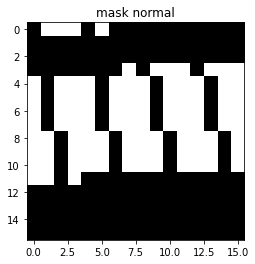

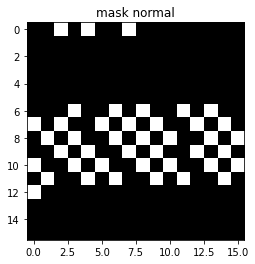

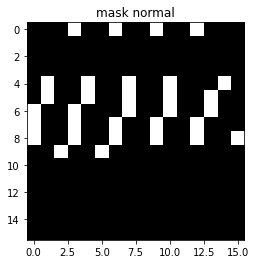

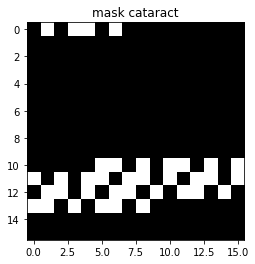

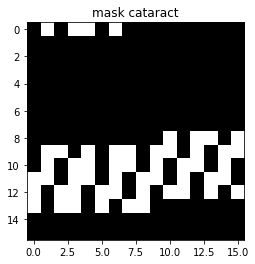

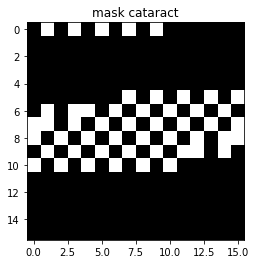

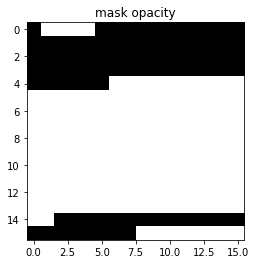

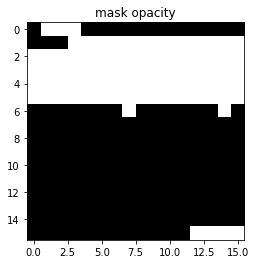

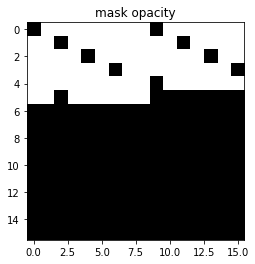

In [433]:
def build_histogram_masks(reference_img, threshold):
    hist_vals = calc_statistics_histogram(reference_img)
    for i in range(0, len(hist_vals)):
        hist_vals[i][hist_vals[i] <= threshold] = 0
        hist_vals[i][hist_vals[i] > threshold] = 1
    return hist_vals

#show_histogram(normal)
#show_histogram(cataract)
#show_histogram(opacity)

mask_cataract = build_histogram_masks(normal, 300)
print_img('mask normal', mask_cataract[0].reshape(16,16))
print_img('mask normal', mask_cataract[1].reshape(16,16))
print_img('mask normal', mask_cataract[2].reshape(16,16))

mask_cataract = build_histogram_masks(cataract, 300)
print_img('mask cataract', mask_cataract[0].reshape(16,16))
print_img('mask cataract', mask_cataract[1].reshape(16,16))
print_img('mask cataract', mask_cataract[2].reshape(16,16))

mask_cataract = build_histogram_masks(opacity, 300)
print_img('mask opacity', mask_cataract[0].reshape(16,16))
print_img('mask opacity', mask_cataract[1].reshape(16,16))
print_img('mask opacity', mask_cataract[2].reshape(16,16))


cataract x normal2: 27624422892
cataract x cataract2: 18050360834
cataract x opacity2: 20820447712


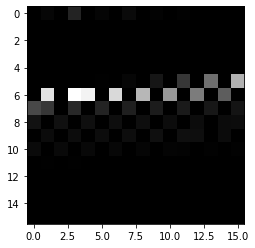

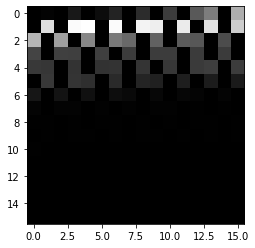

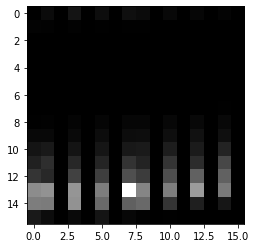

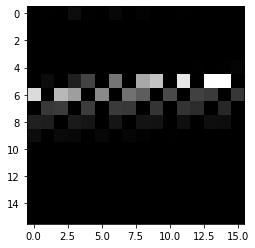

In [427]:
shape = [16, 16]
channel = 2

normal_hist =  calc_statistics_histogram(cataract)[channel].reshape(shape)
cataract_hist = calc_statistics_histogram(cataract)[channel].reshape(shape)
opacity_hist = calc_statistics_histogram(opacity)[channel].reshape(shape)

normal_hist2 = calc_statistics_histogram(normal_2)[channel].reshape(shape)
cataract_hist2 = calc_statistics_histogram(cataract_2)[channel].reshape(shape)
opacity_hist2 = calc_statistics_histogram(opacity_2)[channel].reshape(shape)

p = cataract_hist.dot(normal_hist2).sum()
print (f'cataract x normal2: {cataract_hist.dot(normal_hist2).sum()}')
print (f'cataract x cataract2: {cataract_hist.dot(cataract_hist2).sum()}')
print (f'cataract x opacity2: {cataract_hist.dot(opacity_hist2).sum()}')


print_img('',cataract_hist)
print_img('',normal_hist2)
print_img('',cataract_hist2)
print_img('',opacity_hist2)





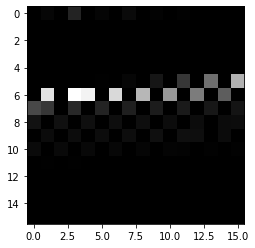

In [428]:
from skimage.exposure import match_histograms
matched = match_histograms(cataract_hist, normal_hist, channel_axis=-1)
print_img('', matched)

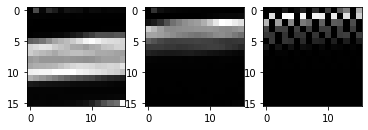

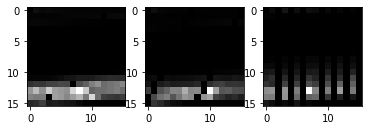

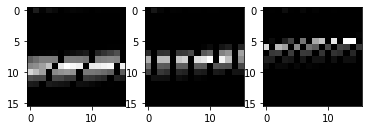

In [429]:


normal_2_p = calc_statistics_histogram(normal_2)
fig, ax = plt.subplots(1,3)
p = normal_2_p
for i in range(0,len(p)):
    ax[i].imshow(p[i].reshape([16,16]), cmap='gray')
        

cataract_2_p = calc_statistics_histogram(cataract_2)
fig, ax = plt.subplots(1,3)
p = cataract_2_p
for i in range(0,len(p)):
    ax[i].imshow(p[i].reshape([16,16]), cmap='gray')

opacity_2_p = calc_statistics_histogram(opacity_2)
fig, ax = plt.subplots(1,3)
p = opacity_2_p
for i in range(0,len(p)):
    ax[i].imshow(p[i].reshape([16,16]), cmap='gray')

In [430]:
from skimage import feature
#mean_cataract = threshold_mean(cataract)
#mean_normal = threshold_mean(normal)

sobel_cataract = sobel(cataract.copy())
sobel_normal = sobel(normal.copy())

#thr_cataract[thr_cataract < 2*mean_cataract] = 0
#thr_normal[thr_normal < 2*mean_normal] = 0

#print_img('cataract', sobel_cataract)
#print_img('normal', sobel_normal)

In [431]:
#data = pd.read_csv(f'{base_dir}/ODIR-5K/data.csv') 
image_db.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,"laser spot,moderate non proliferative retinopathy",moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [432]:

#print(data.head())
#print(data[data['Left-Diagnostic Keywords'] == 'refractive media opacity'].head())
print(data[data['Left-Diagnostic Keywords'] == 'cataract'].head())

TypeError: 'module' object is not subscriptable